In [1]:
import torch
from torch import nn
from torch.nn import functional as F 
from d2l import torch as d2l

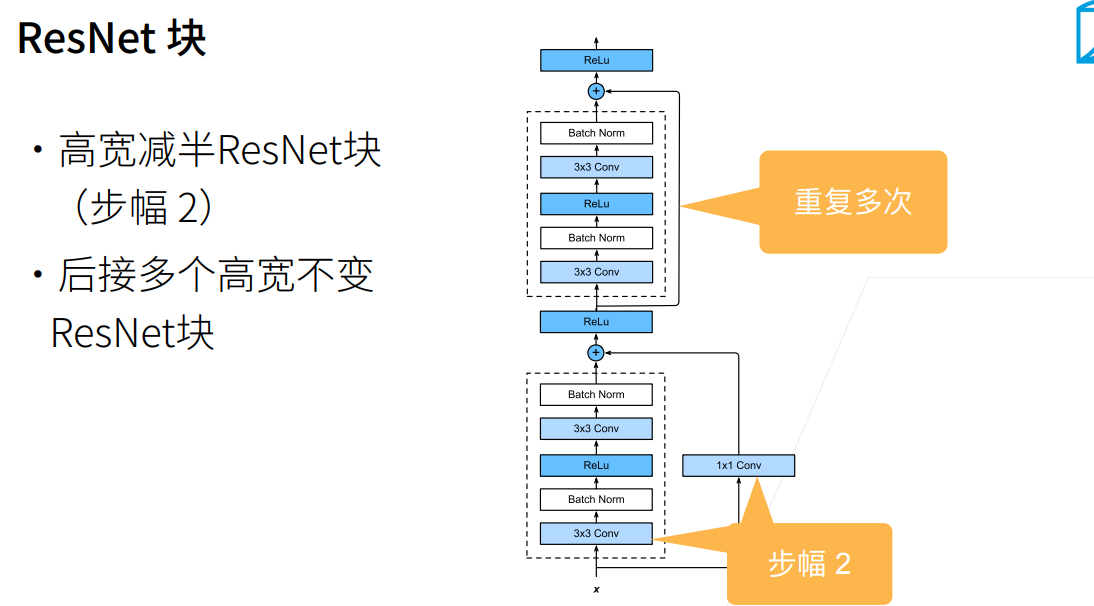

In [2]:
class Residual(nn.Module):
    def __init__(self,input_channels,num_channels,use_1x1conv=False,
                 strides = 1):
        super().__init__()
        self.conv1 = nn.Conv2d(input_channels,num_channels,kernel_size=3,
                               padding=1,stride=strides)
        self.conv2 = nn.Conv2d(num_channels,num_channels,kernel_size=3,padding=1)
        if use_1x1conv:
            self.conv3 = nn.Conv2d(input_channels,num_channels,kernel_size=1,stride=strides)
        else:
            self.conv3 = None
        self.bn1 = nn.BatchNorm2d(num_channels)
        self.bn2 = nn.BatchNorm2d(num_channels)
        self.relu = nn.ReLU(inplace = True)
    def forward(self,X):
        Y = F.relu(self.bn1(self.conv1(X)))
        Y = self.bn2(self.conv2(Y))
        if self.conv3:
            X = self.conv3(X)
        Y += X
        return F.relu(Y)


In [3]:
blk = Residual(3,3)
X = torch.rand(4,3,6,6)
Y = blk(X)
Y.shape

torch.Size([4, 3, 6, 6])

In [ ]:
blk = 